In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imgaug as ia
from imgaug import augmenters as iaa
from helper_dataset import Cards, Backgrounds, create_image, kps_rectangle, write_files, xml_to_csv 
from tqdm import tqdm
from config import *


# Load data

Load all the backgrounds and cards in storaged in .pickle files

In [2]:
# Directory that will contain all kinds of data (the data we download and the data we generate)
data_dir = "./../../data/"

# Pickle file containing the background images from the DTD
backgrounds_pck_fn=data_dir+"backgrounds.pck"

# Pickle file containing the card images
cards_pck_fn=data_dir+"cards.pck"

# Load cards pickle
cards = Cards(cards_pck_fn=cards_pck_fn)

# Load backgrounds pickle
backgrounds = Backgrounds(backgrounds_pck_fn=backgrounds_pck_fn)

Nb of cards loaded per name : {'1c': 15, '2c': 15, '3c': 15, '4c': 15, '5c': 15, '6c': 15, '7c': 15, '8c': 15, '9c': 15}
Nb of images loaded : 33


# Create scenes

## Test

Check if everything is going well

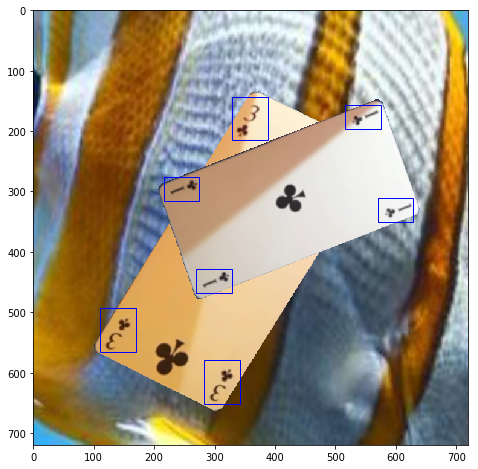

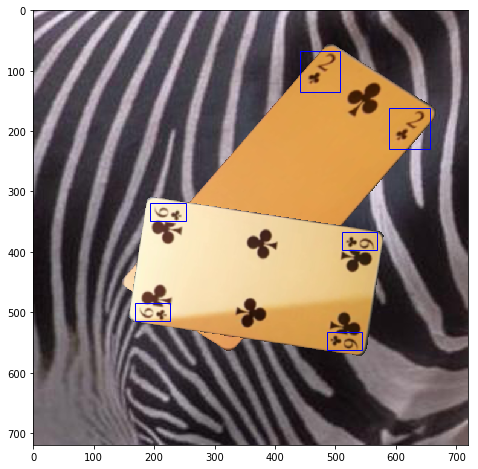

In [10]:
# Define transformations using imgaug 
import cv2

transform_1card = iaa.Sequential([
    iaa.AverageBlur([0,3]),
    iaa.Affine(scale=[0.85,1.15]),
    iaa.Affine(rotate=(-180,180)),
    iaa.Affine(translate_percent={"x":(-0.15,0.15),"y":(-0.15,0.15)}),
    iaa.Affine(shear=[0,20])  
])

transform_2card = iaa.Sequential([
    iaa.AverageBlur([0,3]),
    iaa.Affine(scale=[0.45,0.6]),
    iaa.Affine(rotate=(-180,180)),
    iaa.Affine(translate_percent={"x":(-0.35,0.35),"y":(-0.35,0.35)}),
    iaa.Affine(shear=[0,20])  
])


scaleBg=iaa.Scale({"height": imgH, "width": imgW})

# Check if everything is OK
for i in range(1):
    final,bba, list_kps_aug_1, list_kps_aug_2 = create_image(cards, backgrounds, transform_1card, scaleBg)
    fig,ax=plt.subplots(1,figsize=(8,8))
    ax.imshow(final)
    for kps in list_kps_aug_1:
        x1,x2,y1,y2 = kps_rectangle(kps)
        rect=patches.Rectangle((x1, y1),x2-x1,y2-y1,linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
    for kps in list_kps_aug_2:
        x1,x2,y1,y2 = kps_rectangle(kps)
        rect=patches.Rectangle((x1, y1),x2-x1,y2-y1,linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
        fig.savefig("scene1.png")
        
for i in range(1):
    final,bba, list_kps_aug_1, list_kps_aug_2 = create_image(cards, backgrounds, transform_1card, scaleBg)
    fig,ax=plt.subplots(1,figsize=(8,8))
    ax.imshow(final)
    for kps in list_kps_aug_1:
        x1,x2,y1,y2 = kps_rectangle(kps)
        rect=patches.Rectangle((x1, y1),x2-x1,y2-y1,linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
    for kps in list_kps_aug_2:
        x1,x2,y1,y2 = kps_rectangle(kps)
        rect=patches.Rectangle((x1, y1),x2-x1,y2-y1,linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
        fig.savefig("scene2.png")

## Create database

In [14]:
transform_1card = iaa.Sequential([
    iaa.AverageBlur([0,3]),
    iaa.Affine(scale=[0.85,1.15]),
    iaa.Affine(rotate=(-180,180)),
    iaa.Affine(translate_percent={"x":(-0.15,0.15),"y":(-0.15,0.15)}),
    iaa.Affine(shear=[0,20])  
])

transform_2card = iaa.Sequential([
    iaa.AverageBlur([0,3]),
    iaa.Affine(scale=[0.45,0.6]),
    iaa.Affine(rotate=(-180,180)),
    iaa.Affine(translate_percent={"x":(-0.35,0.35),"y":(-0.35,0.35)}),
    iaa.Affine(shear=[0,20])  
])

scaleBg=iaa.Scale({"height": imgH, "width": imgW})

transforms = [transform_1card, transform_2card]

save_dir = os.path.join(data_dir, "scenes")

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

nb_cards_to_generate = 9

for i in tqdm(range(nb_cards_to_generate)):
    transf = random.choice(transforms)
    final,bba,a,b = create_image(cards, backgrounds, transform_1card, scaleBg)
    write_files(final,save_dir,bba)

100%|██████████| 9/9 [00:01<00:00,  7.74it/s]


# Generate records

In order to use tensorflow we need a .csv which contains the name of each image and all the coordinates of every box.

In addition, we need a .record file which contains all the images and boxes

In [15]:
name_csv = 'cards.csv'

path_csv = os.path.join(data_dir, name_csv)

image_path = os.path.join(os.getcwd(), save_dir)
xml_df = xml_to_csv(image_path)
xml_df.to_csv(path_csv, index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


Generate records is less directly, 
we have to modify the file `generate_records.py` and make two changes.

1. Change the folder where the images are located
2. Add the names of all the classes you use

Then we change in the following cell, `csv_inpt`, `image_dir` and select an `output_path`

In [16]:
!python generate_tfrecord.py \
    --csv_input=../../data/cards.csv \
    --image_dir=./../../data/scenes \
    --output_path=../training/cfg/train.record

Successfully created the TFRecords: /home/michel/Documents/GitHub/CardDetection/samples/gen_dataset/../training/cfg/train.record
